# Image Processing (Part2)
Tasks:
- Create a slide show of images in a folder with smooth transition between images using cv2.addWeighted function

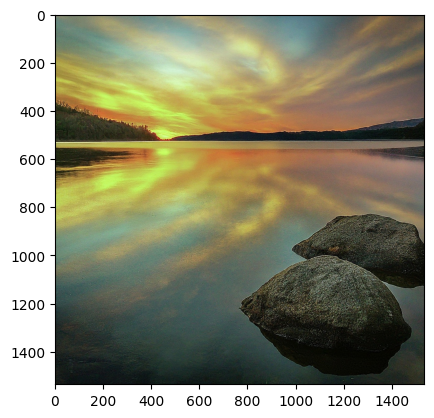

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
img1 = cv2.imread('data\person1.png')
img2 = cv2.imread('data\dark_image.jpg')
img3 = cv2.imread('data\light_image.jpg')
bgr_img = cv2.cvtColor(img3, cv2.COLOR_RGB2BGR)
plt.imshow(bgr_img)

In [2]:
# Make images same height
def scale_to_height(img, desired_height):
    height, width = img.shape[:2]
    scale_factor = desired_height / height
    new_width = int(width * scale_factor)
    dim = (new_width, desired_height)
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return resized
img2 = scale_to_height(img2, img1.shape[0])
img3 = scale_to_height(img3, img1.shape[0])

In [3]:
print(img1.shape)
print(img2.shape)
print(img3.shape)

(271, 271, 3)
(271, 271, 3)
(271, 271, 3)


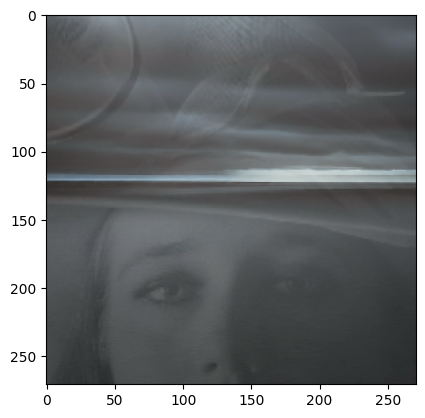

In [4]:
img = cv2.addWeighted(img1, 0.3, img2, 0.7, 0)
plt.imshow(img)

In [42]:
def images_to_video(images, output_file, fps=24):
    """
    Converts an array of images to a video.

    Args:
        images: A list of NumPy arrays representing images.
        output_file: The output video file path.
        fps: Frames per second for the video.
    """

    # Determine the size of the frames from the first image
    height, width, channels = images[0].shape

    # Create a video writer object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change codec if needed
    out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

    # Write each image as a frame
    for image in images:
        out.write(image)

    # Release the video writer
    out.release()

# Example usage:
# Assuming you have a list of images named 'images'
images = [img1, img2, img3]
output_video = 'res/smooth_transition.mp4'
images_to_video(images, output_video, fps=1)

In [43]:
def generate_transition(img1, img2):
    alphas = np.linspace(0, 1, 100)[1:-1]
    return [cv2.addWeighted(img2, alpha, img1, 1-alpha, 0) for alpha in alphas]
imgs = generate_transition(img2, img3)
print(len(imgs))

98


In [44]:
res_images = [img1]
for image in images[1:]:
    imgs = generate_transition(res_images[-1], image)
    res_images += imgs
    res_images += [image]
output_video = 'res/smooth_transition.mp4'
images_to_video(res_images, output_video)

# Filter parameters selection
- First task: the utility provides facility to select parameters for one filter for one image with trackbars
- Second task: selects parameters for video
- Third task: compare different filters

In [5]:
def camera_snippet():
    # Video capturing snippet
    cap = cv2.VideoCapture(0) 

    while(True): 

        # Capture the video frame 
        # by frame 
        ret, frame = cap.read()

        # Display the resulting frame 
        cv2.imshow('frame', frame) 
        if cv2.waitKey(1) & 0xFF == 27: # Esc
            break

    cap.release() 
    cv2.destroyAllWindows() 
    
    
# Parameters selection utility
def param_selection(image, args_dict, func):
    def nothing(x):
        pass
    # Create a window
    cv2.namedWindow('image')
    args = args_dict.keys()
    # Initialize values
    vals = np.zeros(len(args), dtype='int')
    pVals = np.zeros(len(args), dtype='int')
    for arg in args:
        val = args_dict[arg]
        cv2.createTrackbar(arg, 'image', val[0], val[1], nothing)
    for arg in args:
        val = args_dict[arg]
        cv2.setTrackbarPos(arg, 'image', val[2])

    # Get current positions of all trackbars
        for i, arg in enumerate(args):
            vals[i] = cv2.getTrackbarPos(arg, 'image')
    result = func(image, vals) # Apply changes

    while(1):
        # Get current positions of all trackbars
        for i, arg in enumerate(args):
            vals[i] = cv2.getTrackbarPos(arg, 'image')

        if np.any(np.not_equal(vals, pVals)):
            result = func(image, vals) # Apply changes
            s = ""
            for i, arg in enumerate(args):
                s = s + arg + " = " + str(vals[i]) + " "
            print(s)
            for i in range(len(args)):
                pVals[i] = vals[i]

        # Display result image
        cv2.imshow('image', result)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cv2.destroyWindow("image")
    cv2.destroyAllWindows()
    
d = {'hMin': (0, 179, 0), 'sMin': (0, 255, 0), 'vMin': (0, 255, 0), 'hMax': (0, 179, 179), 'sMax': (0, 255, 255), 'vMax': (0, 255, 255)}
def inRange(image, vals):
    lower = np.array([vals[0], vals[1], vals[2]])
    upper = np.array([vals[3], vals[4], vals[5]])
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(image, image, mask=mask)
    return res

img = img1
param_selection(img, d, inRange)

hMin = 0 sMin = 0 vMin = 0 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 2 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 3 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 6 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 9 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 18 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 23 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 24 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 27 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 28 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 30 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 33 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 35 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 36 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 38 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin = 0 vMin = 39 hMax = 179 sMax = 255 vMax = 255 
hMin = 0 sMin

hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 173 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 174 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 176 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 182 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 185 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 189 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 196 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 200 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 209 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 211 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 217 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 224 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 228 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 235 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 239 
hMin = 0 sMin = 0 vMin = 10 hMax = 179 sMax = 255 vMax = 244 
hMin = 0

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [8]:
def init_trackbars(param_dict, win_name):
    def nothing(x):
        pass
    # Create trackbars
    for param in param_dict:
        min_val, max_val, default_val = param_dict[param]
        cv2.createTrackbar(param, win_name, min_val, max_val, nothing)
        cv2.setTrackbarPos(param, win_name, default_val)
        
# Parameters selection utility
def param_selection(image, param_dict, func):
    # Create a window
    win_name = 'image'
    cv2.namedWindow(win_name)
        
    init_trackbars(param_dict, win_name)

    previous_param_values = np.zeros(len(param_dict), dtype=np.int32)
    current_param_values = np.zeros(len(param_dict), dtype=np.int32)
    
    while(1):
        # Get current parameter values
        current_param_values = [cv2.getTrackbarPos(param, win_name) for param in param_dict.keys()]

        # Check for parameter changes
        if not np.array_equal(previous_param_values, current_param_values):
            result = func(image, current_param_values)  # Apply changes
            param_str = ", ".join(f"{param}={value}" for param, value in zip(param_dict.keys(), current_param_values))
            print(param_str)
            previous_param_values = current_param_values.copy()

        # Display result image
        cv2.imshow(win_name, result)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cv2.destroyWindow("image")
    cv2.destroyAllWindows()
    
img = img1
param_selection(img, d, inRange)

hMin=0, sMin=0, vMin=0, hMax=179, sMax=255, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=253, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=249, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=246, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=244, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=241, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=239, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=235, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=230, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=226, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=225, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=224, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=223, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=222, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=221, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=220, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=219, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=216, vMax=255
hMin=0, sMin=0, vMin=0, hMax=179, sMax=213, vM

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [10]:
d = {'Lower threshold': (0, 255, 50), 'Upper threshold': (0, 255, 100)}
def canny(image, vals):
    res = cv2.Canny(image, vals[0], vals[1])
    return res
img = cv2.imread('data\person1.png')
param_selection(img, d, canny)

Lower threshold=50, Upper threshold=100
Lower threshold=50, Upper threshold=103
Lower threshold=50, Upper threshold=107
Lower threshold=50, Upper threshold=110
Lower threshold=50, Upper threshold=112
Lower threshold=50, Upper threshold=114
Lower threshold=50, Upper threshold=116
Lower threshold=50, Upper threshold=119
Lower threshold=50, Upper threshold=123
Lower threshold=50, Upper threshold=128
Lower threshold=50, Upper threshold=134
Lower threshold=50, Upper threshold=141
Lower threshold=50, Upper threshold=154
Lower threshold=50, Upper threshold=166
Lower threshold=50, Upper threshold=181
Lower threshold=50, Upper threshold=188
Lower threshold=50, Upper threshold=197
Lower threshold=50, Upper threshold=206
Lower threshold=50, Upper threshold=210
Lower threshold=50, Upper threshold=215
Lower threshold=50, Upper threshold=213
Lower threshold=50, Upper threshold=208
Lower threshold=50, Upper threshold=199
Lower threshold=50, Upper threshold=192
Lower threshold=50, Upper threshold=186


In [11]:
def param_selection_video(param_dict, func):
    cap = cv2.VideoCapture(0)
    win_name = 'video'
    cv2.namedWindow(win_name)
    
    init_trackbars(param_dict, win_name)
    current_param_values = np.zeros(len(param_dict), dtype=np.int32)
    
    while(True): 
        # Capture the video frame 
        # by frame 
        ret, frame = cap.read()
        current_param_values = [cv2.getTrackbarPos(param, win_name) for param in param_dict.keys()]
        result = func(frame, current_param_values)  # Apply changes
        
        # Display the resulting frame 
        cv2.imshow(win_name, result) 
        if cv2.waitKey(1) & 0xFF == 27: # Esc
            break

    cap.release() 
    cv2.destroyAllWindows()

In [13]:
param_selection_video(d, canny)

In [8]:
import cv2
import numpy as np

d = {'hMin': (0, 179, 0), 'sMin': (0, 255, 0), 'vMin': (0, 255, 0), 'hMax': (0, 179, 179), 'sMax': (0, 255, 255), 'vMax': (0, 255, 255)}
def inRange(image, vals):
    lower = np.array([vals[0], vals[1], vals[2]])
    upper = np.array([vals[3], vals[4], vals[5]])
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(image, image, mask=mask)
    return res
img = cv2.imread('data\person1.png')
#param_selection(img, d, inRange)
param_selection_video(d, inRange)

# Compare filters

In [15]:
# Compare different filters
import cv2
import numpy as np  # Use numpy for clarity

# Define filter constants
PREVIEW = 0
BLUR = 1
FEATURES = 2
CANNY = 3
BILATERAL = 4

# Define filter names dictionary
filter_names = {
    PREVIEW: 'Preview',
    BLUR: 'Blur',
    FEATURES: 'Features',
    CANNY: 'Canny',
    BILATERAL: 'Bilateral'
}

def apply_filter(frame, filter_type, feature_params):
    """Applies a filter to the frame based on the filter type.

    Args:
        frame: The input frame as a NumPy array.
        filter_type: The type of filter to apply (PREVIEW, BLUR, FEATURES, CANNY).
        feature_params: Dictionary containing parameters for the feature detector (optional).

    Returns:
        The filtered frame as a NumPy array.
    """

    if filter_type == PREVIEW:
        return frame
    elif filter_type == CANNY:
        return cv2.Canny(frame, 80, 150)
    elif filter_type == BLUR:
        return cv2.blur(frame, (13, 13))
    elif filter_type == FEATURES:
        try:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            corners = cv2.goodFeaturesToTrack(frame_gray, **feature_params)
            if corners is not None:
                for x, y in corners.astype(int).reshape(-1, 2):
                    cv2.circle(frame, (x, y), 10, (0, 255, 0), 1)
            return frame
        except Exception as e:
            print("An unexpected error occurred:", e)
            return frame  # Return original frame on error
    elif filter_type == BILATERAL:
        return cv2.bilateralFilter(frame, 15, 75, 75)
    return frame

def handle_keyboard(current_filter):
    # Keyboard input handling
    save_one_image = False
    alive = True
    key = cv2.waitKey(1)
    if key == ord("q") or key == ord("Q") or key == 27:
        alive = False
    elif key in (ord("c"), ord("C")):
        current_filter = CANNY
    elif key in (ord("b"), ord("B")):
        current_filter = BLUR
    elif key in (ord("i"), ord("I")):
         current_filter = BILATERAL
    elif key in (ord("f"), ord("F")):
        current_filter = FEATURES
    elif key in (ord("p"), ord("P")):
        current_filter = PREVIEW
    elif key in (ord("s"), ord("S")):
        save_one_image = True
    return current_filter, save_one_image, alive

# Set initial state
save_one_image = False
feature_params = dict(maxCorners=500, qualityLevel=0.2, minDistance=15, blockSize=9)
current_filter = PREVIEW

# Window and capture setup
window_name = "Camera Filters"
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cap = cv2.VideoCapture(0)
alive = True
while alive:
    # Capture frame
    ret, frame = cap.read()
    if not ret:
        break  # Handle failed frame capture gracefully

    # Apply filter based on current_filter
    filtered_frame = apply_filter(frame, current_filter, feature_params)

    # Save image (if requested)
    if save_one_image:
        cv2.imwrite(f'res/{filter_names[current_filter]}_01.png', filtered_frame)
        save_one_image = False

    # Display frame
    cv2.imshow(window_name, filtered_frame)
    
    # Keyboard input handling
    current_filter, save_one_image, alive = handle_keyboard(current_filter)


# Release resources
cap.release()
cv2.destroyAllWindows()